# Problem Set 7

In [1]:
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pandas as pd

## Question 1

From {doc}`Data Visualization: Rules and Guidelines <../applications/visualization_rules>`

Create a bar chart of the below data on Canadian GDP growth.
Use a non-red color for the years 2000 to 2008, red for
2009, and the first color again for 2010 to 2018.

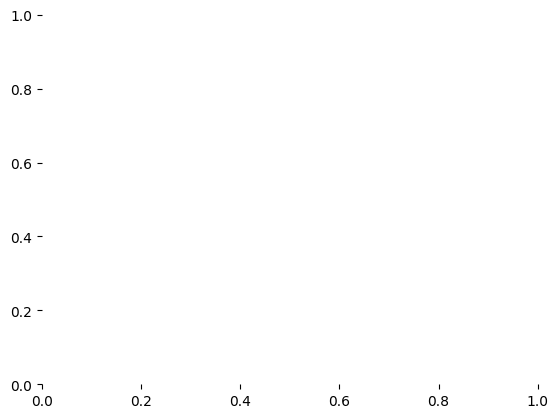

In [2]:
ca_gdp = pd.Series(
    [5.2, 1.8, 3.0, 1.9, 3.1, 3.2, 2.8, 2.2, 1.0, -2.8, 3.2, 3.1, 1.7, 2.5, 2.9, 1.0, 1.4, 3.0],
    index=list(range(2000, 2018))
)

fig, ax = plt.subplots()

for side in ["right", "top", "left", "bottom"]:
    ax.spines[side].set_visible(False)

## Question 2

From {doc}`Data Visualization: Rules and Guidelines <../applications/visualization_rules>`

Draft another way to organize time and education by modifying the code below.
That is, have two subplots (one for each
education level) and four groups of points (one for each year).

Why do you think they chose to organize the information the way they
did rather than this way?

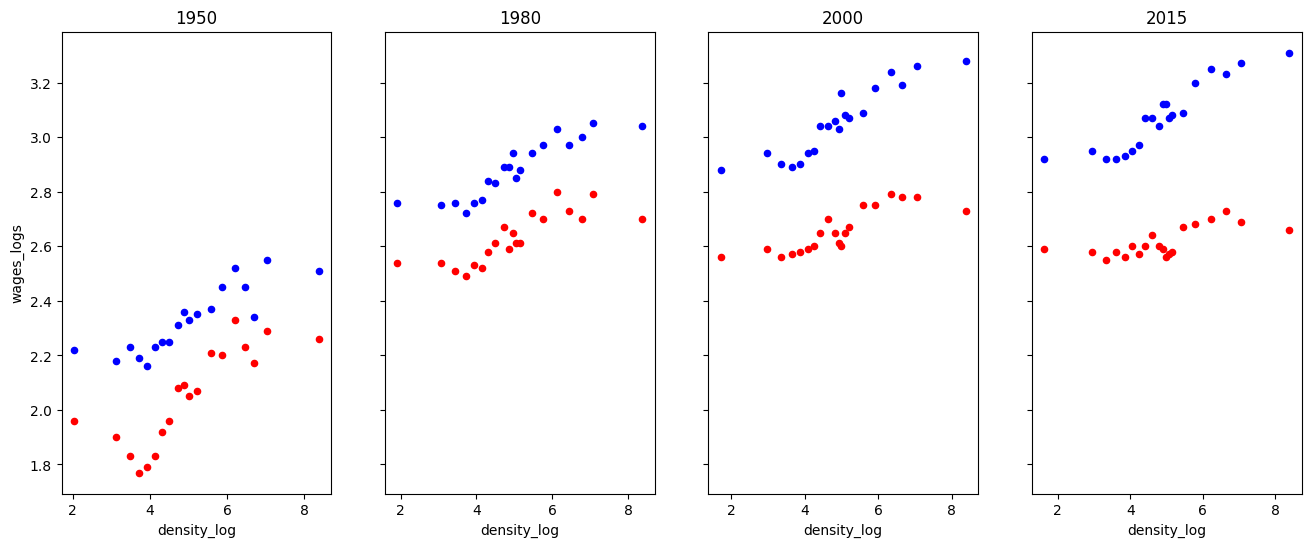

In [3]:
# Read in data
df = pd.read_csv("https://datascience.quantecon.org/assets/data/density_wage_data.csv")
df["year"] = df.year.astype(int)  # Convert year to int


def single_scatter_plot(df, year, educ, ax, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    # Filter data to keep only the data of interest
    _df = df.query("(year == @year) & (group == @educ)")
    _df.plot(
        kind="scatter", x="density_log", y="wages_logs", ax=ax, color=color
    )

    return ax

# Create initial plot
fig, ax = plt.subplots(1, 4, figsize=(16, 6), sharey=True)

for (i, year) in enumerate(df.year.unique()):
    single_scatter_plot(df, year, "college", ax[i], "b")
    single_scatter_plot(df, year, "noncollege", ax[i], "r")
    ax[i].set_title(str(year))

## Questions 3-5

These question uses a dataset from the [Bureau of Transportation
Statistics](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp)
that describes the cause for all US domestic flight delays
in November 2016. We used the same data in the previous problem set.

In [4]:
url = "https://datascience.quantecon.org/assets/data/airline_performance_dec16.csv.zip"
air_perf = pd.read_csv(url)[["CRSDepTime", "Carrier", "CarrierDelay", "ArrDelay"]]
air_perf.info()
air_perf.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460949 entries, 0 to 460948
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CRSDepTime    460949 non-null  object 
 1   Carrier       460949 non-null  object 
 2   CarrierDelay  460949 non-null  float64
 3   ArrDelay      452229 non-null  float64
dtypes: float64(2), object(2)
memory usage: 14.1+ MB


<bound method NDFrame.head of                  CRSDepTime Carrier  CarrierDelay  ArrDelay
0       2016-12-18 15:58:00      AA           0.0      20.0
1       2016-12-19 15:58:00      AA           0.0      20.0
2       2016-12-20 15:58:00      AA           0.0      -3.0
3       2016-12-21 15:58:00      AA           0.0     -10.0
4       2016-12-22 15:58:00      AA           0.0      -8.0
...                     ...     ...           ...       ...
460944  2016-12-30 05:25:00      DL           0.0      -5.0
460945  2016-12-30 13:42:00      DL           0.0       3.0
460946  2016-12-30 15:28:00      DL           0.0     -29.0
460947  2016-12-30 11:15:00      DL           0.0      -3.0
460948  2016-12-30 13:45:00      DL           0.0     -10.0

[460949 rows x 4 columns]>

The following questions are intentionally somewhat open-ended. For
each one, carefully choose the type of visualization you'll create.
Put some effort into choosing colors, labels, and other
formatting.

### Question 3

Create a visualization of the relationship between airline (carrier)
and delays.

### Question 4

Create a visualization of the relationship between date and delays.

### Question 5

Create a visualization of the relationship between location (origin
and/or destination) and delays.